In [1]:
import torch
import torch.nn as nn

import fastai

from pytorch_tabnet.sparsemax import (
    Sparsemax
)

from fastai.tabular.all import (
    LinBnDrop
)

from fastai.layers import (
    Identity

)

from Quick.cleaning.loading import (
    examine_dataset
)

from Quick.cleaning.utils import (
    get_file_path
)

from Quick.runners.deep import (
    run_deep_nn_experiment
)

from Quick.runners.residual import (
    run_residual_deep_nn_experiment
)

from Quick.runners.sk import (
    run_sk_experiment
)

from Quick.runners.torch import (
    run_torch_nn_experiment
)

from Quick.constants import *

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
torch.backends.mps.is_available()

True

In [3]:
type(torch.device('mps'))

torch.device

In [4]:
print(torch.backends.mps.is_built())

True


In [5]:
torch.backends.mps.is_built()

True

In [6]:
data_path_1: str = './data/'
data_sets_1: list = [
    'Darknet_experiments_base.csv'
]

file_path_1: callable = get_file_path(data_path_1)
file_set_1: list = list(map(file_path_1, data_sets_1))
current_job: int = 0

dataset_1 = examine_dataset(0, file_set_1, data_sets_1)

Dataset 0/1: We now look at ./data/Darknet_experiments_base.csv


Loading Dataset: ./data/Darknet_experiments_base.csv
	To Dataset Cache: ./cache/Darknet_experiments_base.csv.pickle


        File:				./data/Darknet_experiments_base.csv  
        Job Number:			0
        Shape:				(117620, 64)
        Samples:			117620 
        Features:			64
    


In [7]:
dataset_1['Dataset'].head(100) # pandas dataframe

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Traffic Type,Application Type
0,6,119384497,767,2027,90681,2448831,543,0,118.228162,224.244409,...,65535,65535,166,20,1.456330e+15,3.683488e+07,1.456330e+15,1.456330e+15,Tor,audio-streaming
1,6,119754701,1021,2537,171290,2922270,1460,0,167.766895,280.092409,...,65535,65535,292,20,1.456330e+15,3.558961e+07,1.456330e+15,1.456330e+15,Tor,audio-streaming
2,6,118908117,683,1662,77649,2001627,543,0,113.688141,221.086482,...,65535,65535,142,20,1.456330e+15,3.301057e+07,1.456330e+15,1.456330e+15,Tor,audio-streaming
3,6,739728,2,2,543,543,543,0,271.500000,383.958982,...,41180,65535,0,20,1.456330e+15,5.227810e+05,1.456330e+15,1.456330e+15,Tor,audio-streaming
4,6,149270,2,2,565,565,565,0,282.500000,399.515331,...,41180,65535,0,20,1.456330e+15,1.052330e+05,1.456330e+15,1.456330e+15,Tor,audio-streaming
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6,115426365,1108,2185,98188,2685198,1057,0,88.617329,226.052655,...,65535,65535,159,20,1.456340e+15,3.779664e+07,1.456340e+15,1.456340e+15,Tor,audio-streaming
96,6,118649517,875,1826,87821,2207469,1057,0,100.366857,218.139038,...,65535,65535,156,20,1.456340e+15,3.215990e+07,1.456340e+15,1.456340e+15,Tor,audio-streaming
97,6,116057783,1116,2238,99137,2738064,1460,0,88.832437,210.860857,...,65535,65535,175,20,1.456340e+15,4.012400e+07,1.456340e+15,1.456340e+15,Tor,audio-streaming
98,6,111719872,793,1645,74731,2013766,1057,0,94.238335,217.130895,...,65535,65535,130,20,1.456340e+15,2.806112e+07,1.456340e+15,1.456340e+15,Tor,audio-streaming


In [8]:
# we are going to select a random subset of our data

df = dataset_1['Dataset'].sample(frac=0.1, random_state=42)

In [9]:
dataset_1['Dataset'].shape

(117620, 64)

In [10]:
df.shape

(11762, 64)

Shape of Input Data: (11762, 63)


epoch,train_loss,valid_loss,accuracy,balanced_accuracy_score,roc_auc_score,matthews_corrcoef,f1_score,precision_score,recall_score,time
0,1.485956,1.091229,0.000000,0.000000,0.822516,0.000000,0.000000,0.000000,0.000000,00:10
1,0.960256,0.831785,0.000000,0.000000,0.863921,0.000000,0.000000,0.000000,0.000000,00:10


/Users/jameshalladay/opt/anaconda3/envs/fast_gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/jameshalladay/opt/anaconda3/envs/fast_gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jameshalladay/opt/anaconda3/envs/fast_gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


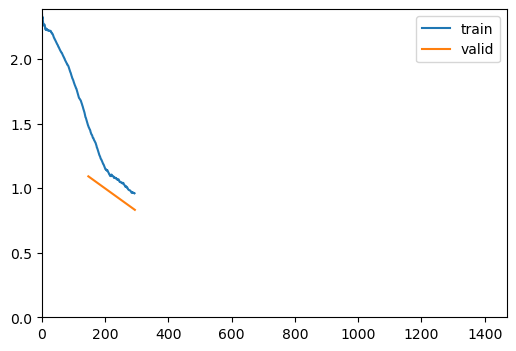

/Users/jameshalladay/opt/anaconda3/envs/fast_gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/jameshalladay/opt/anaconda3/envs/fast_gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jameshalladay/opt/anaconda3/envs/fast_gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KeyboardInterrupt: 

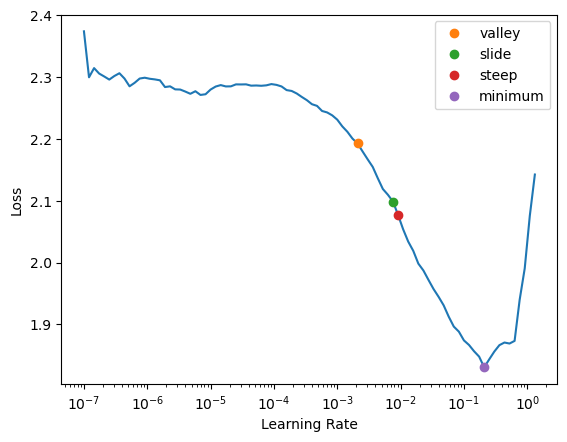

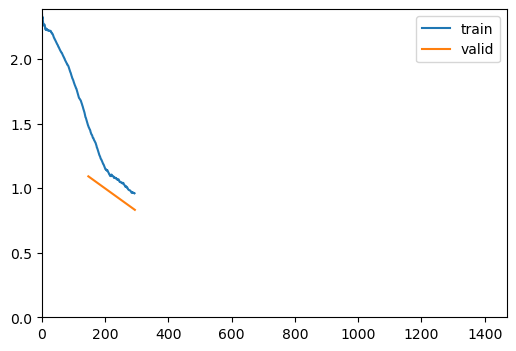

In [11]:
results = run_deep_nn_experiment(df.drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type',(50 for _ in range(10)))

In [ ]:
results_res = run_residual_deep_nn_experiment(df.drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type', (50 for _ in range(10)))

In [ ]:
results_sk = run_sk_experiment(df.drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type')

In [ ]:
import torch.nn as nn
from fastai.tabular.all import LinBnDrop
from fastai.layers import Identity

class BottleneckResidualBlock(nn.ModuleList):
# class BottleneckResidualBlock(Module):
    '''
        A residule block that creates a skip connection around a set of n branches
            where the number of branches is determined by the number of input modules
            in the branches list parameter.

            the residual connection is put through a linear batchnormed layer if the
            input size is different from the output size
            Then, the output of the branches is summed together along with the possibly transformed input
    '''
    def __init__(self, branches: list, layer: int, in_size: int, out_size: int):
        super().__init__(branches)
        
        self.branches = branches
        self.layer = layer

        self.in_size = in_size
        self.out_size = out_size

        if(in_size != out_size):
            # self.identity_path = nn.Linear(in_size, out_size)
            # self.identity_path = BnReluLin(in_size, out_size)
            self.identity_path = LinBnDrop(in_size, out_size)
        else:
            self.identity_path = Identity()


    def forward(self, inputs):

        fx = self.branches[0](inputs)
        for i in range(len(self.branches) - 1):
            fx += self.branches[i + 1](inputs)

        if(inputs.shape != fx.shape):
            inputs = self.identity_path(inputs)
        return fx + inputs



class Simple_Resnet_Model(nn.Module):
    def __init__(self, input_features=62, layers=[50 for _ in range(10)], output_features=8, config: dict = None):
        super().__init__()
        self._layers = []
        _activations = [nn.ReLU(inplace=True) for _ in range(len(layers) - 1)] + [None]

        for i, x in enumerate(layers):
            print(i)
            if (i == 0):
                print(f'i = {i} == 0')
                self._layers.append(BottleneckResidualBlock([LinBnDrop(input_features, layers[i+1], act=_activations[i], lin_first=True)], i, input_features, layers[i+1]))
            elif (i == len(layers) - 1):
                print(f'i = {i} == {len(layers) - 1}')
                self._layers.append(BottleneckResidualBlock([LinBnDrop(x, output_features, act=_activations[i], lin_first=True)], i, x, output_features))
                # self._layers.append(LinBnDrop(x, output_features, act=_activations[i], lin_first=True))
            else:
                self._layers.append(BottleneckResidualBlock([LinBnDrop(x, layers[i+1], act=_activations[i], lin_first=True)], i, x, layers[i+1]))
        
        self.out = nn.Sequential(*self._layers)     
        
    def forward(self, x):
        return self.out(x)


results_simple_res = run_torch_nn_experiment(df.drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type', Simple_Resnet_Model)

In [11]:
class Simple_Filter(nn.Module):
    '''
        A simple filter that takes in a tensor of shape (batch_size, channels, input_features) and returns a tensor of shape (batch_size, 1, input_features * output_features)
    '''
    def __init__(
        self, 
        input_features = 62, 
        output_features = 8,
        channels = 1,
        width = 5,
        config: dict = None,
        verbose: bool = False,
        device: str = 'cpu'
    ):
        super().__init__()

        self.in_size = input_features
        self.out_size = output_features
        self.width = width

        self.sparse_neighborhood = nn.Sequential(
            nn.Linear(input_features * channels, input_features, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(input_features, input_features, bias=False),
            Sparsemax()
        )

        self.kernel = nn.Sequential(
            nn.Linear(input_features * channels, output_features, bias=False),
        )

        self.flag: bool = verbose
        self.local_flag: bool = verbose

        self.device = torch.device(device)
        self.device_type = device
        # self.sparse_neighborhood.to(self.device)
        # # self.kernel.to(self.device)
        # # self.sparse_neighborhood.to(self.device_type)
        # self.kernel.to(self.device_type)

        
    def forward(self, x):
        if self.flag:
            print('initial shape:\t\t\t', x.shape)

        # Each feature has a sparse neighborhood we can calculate using self.sparse_neighborhood
        output = torch.zeros(x.shape[0], 1, 0, device=self.device_type)
        # output.to(self.device)
        # x.to(self.device_type)

        print('x device:\t\t\t', x.device)
        # send x to self.device
        x = x.to(self.device_type)
        print('x device:\t\t\t', x.device)

        print('output device:\t\t\t', output.device)

        for i in range(x.shape[2]):

            # first, we extract a single feature x_i and duplicate + concatenate it to match the shape of x, giving us y
            y = torch.cat(tuple((x[:, :, i].reshape(-1, x.shape[1], 1) for _ in range(x.shape[2]))), dim=2)
            if self.local_flag:
                print('conv variable size:\t\t', y.shape, len(y))
            
            if self.local_flag:
                print('input size:\t\t\t', x.shape)


            # next, we calculate the sparse neighborhood of y
            conv = (x - y).reshape(x.shape[0], -1)
            # conv.to(self.device_type)
            nb = self.sparse_neighborhood(conv)
            # nb = self.sparse_neighborhood((x - y).reshape(x.shape[0], -1))
            
            if self.local_flag:
                print("neighborhood:\t\t\t", nb.shape)
                print('neighborhood contents:')
                print(nb)

            # we create a mask of the same shape as x, but one that has the sparse neighborhood of x_i
            mask = torch.cat(tuple((nb.reshape(nb.shape[0], 1, -1) for _ in range(x.shape[1]))), dim=1)

            if self.local_flag:
                print('mask size: \t\t\t', mask.shape)
                print('mask contents:')
                print(mask)
                self.local_flag = False


            # we extract the sparse neighborhood of x_i from x
            xm = x * mask

            # finally, we perform the convolution using the kernel on the sparse neighborhood of x_i
            output_i = self.kernel(xm.reshape(x.shape[0], -1))

            # output_i.to(self.device)

            print('output_i device:\t\t', output_i.device)
            print('output device:\t\t\t', output.device)
            # output.to(self.device)
            print('output device:\t\t\t', output.device)

            # to finish, we concatenate the output for this x_i to the output tensor
            output = torch.cat((output, output_i.reshape(x.shape[0], 1, -1)), dim=2)




        if self.flag:
            print("post-run - simple filter:\t", output.shape)
            self.flag = False

        return output

batch_size = 3
features = 4
channels = 2
width = 1

feature_multiplier = 2


test_vals = torch.randn(batch_size, channels, features)
# test_vals = torch.randn(batch_size, channels, features).to(torch.device('mps'))

test_filter = Simple_Filter(input_features=features, output_features=feature_multiplier, width=width, channels=channels, verbose=True, device='mps')
test_filter = test_filter.to(torch.device('mps'))
test_filter(test_vals)

initial shape:			 torch.Size([3, 2, 4])
x device:			 cpu
x device:			 mps:0
output device:			 mps:0
conv variable size:		 torch.Size([3, 2, 4]) 3
input size:			 torch.Size([3, 2, 4])
neighborhood:			 torch.Size([3, 4])
neighborhood contents:
tensor([[0.2047, 0.7953, 0.0000, 0.0000],
        [0.0252, 0.5048, 0.0000, 0.4700],
        [0.2399, 0.7319, 0.0000, 0.0282]], device='mps:0',
       grad_fn=<SparsemaxFunctionBackward>)
mask size: 			 torch.Size([3, 2, 4])
mask contents:
tensor([[[0.2047, 0.7953, 0.0000, 0.0000],
         [0.2047, 0.7953, 0.0000, 0.0000]],

        [[0.0252, 0.5048, 0.0000, 0.4700],
         [0.0252, 0.5048, 0.0000, 0.4700]],

        [[0.2399, 0.7319, 0.0000, 0.0282],
         [0.2399, 0.7319, 0.0000, 0.0282]]], device='mps:0',
       grad_fn=<CatBackward0>)
output_i device:		 mps:0
output device:			 mps:0
output device:			 mps:0
output_i device:		 mps:0
output device:			 mps:0
output device:			 mps:0
output_i device:		 mps:0
output device:			 mps:0
output device

tensor([[[-0.0996, -0.1240, -0.0667, -0.0299, -0.0776, -0.0141, -0.0805,
          -0.1021]],

        [[ 0.1441,  0.0054,  0.1606,  0.0096,  0.1608,  0.0102,  0.1610,
           0.0111]],

        [[-0.0359, -0.0341, -0.0217, -0.0159, -0.0429,  0.0133, -0.0096,
           0.0083]]], device='mps:0', grad_fn=<CatBackward0>)

In [12]:
class Debug_Module(nn.Module):
    def __init__(self, name: str = 'Debug_Module', layers: list = None):
        super().__init__()

        self.name = name
        self.flag = True

        if layers is not None:
            self.layers = nn.Sequential(*layers)

    def forward(self, x):
        if self.flag:
            print(f'{self.name} - {x.shape}')
            self.flag = False

        return x


class Simple_Filter_1(nn.Module):
    def __init__(self, input_features = 62, output_features = 8, config: dict = {
        'channels': 1,
        'width': 5
    }):
        super().__init__()

        self.channels = config['channels']
        self.width = config['width']


        self.out = nn.Sequential(
            Simple_Filter(input_features, self.width, channels=self.channels),
            # now we flatten the output to a batch_size x (input_features * width) tensor
            Debug_Module('pre-flatten'),
            nn.Flatten(1),
            Debug_Module('post-flatten'),
            nn.Linear(input_features * self.width, output_features)
        )

        self.flag: bool = True


    def forward(self, x):
        if self.flag:
            print('Pre-run: simple_model -', x.shape)

        x = x.reshape(x.shape[0], self.channels, x.shape[1])
        if self.flag:
            print("reshaped: simple_model -", x.shape)


        x = self.out(x)
        
        if self.flag:
            print('Post-run: simple_model -', x.shape)
            self.flag = False

        # raise Exception('stop')
        return x

results_simple_filter = run_torch_nn_experiment(df.drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type', Simple_Filter_1, config = {
        'channels': 1,
        'width': 5
    }, device = 'mps')


Shape of Input Data: (11762, 63)


NameError: name 'Simple_Filter' is not defined

In [ ]:
class SpareConv(nn.Module):
    '''
        A simple filter that takes in a tensor of shape (batch_size, channels, input_features) and returns a tensor of shape (batch_size, 1, input_features * width)
    '''
    def __init__(
        self, 
        input_features = 62, 
        width = 1,
        channels = 1,
        config: dict = None,
        verbose: bool = False
    ):
        super().__init__()

        self.in_size = input_features
        self.out_size = width
        self.width = width

        self.sparse_neighborhood = nn.Sequential(
            nn.Linear(input_features * channels, input_features, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(input_features, input_features, bias=False),
            Sparsemax()
        )

        self.kernel = nn.Sequential(
            nn.Linear(input_features * channels, self.width, bias=False),
        )

        self.flag: bool = verbose
        self.local_flag: bool = verbose

        
    def forward(self, x):
        if self.flag:
            print('initial shape:\t\t\t', x.shape)

        # Each feature has a sparse neighborhood we can calculate using self.sparse_neighborhood
        output = torch.zeros(x.shape[0], 1, 0)
        
        for i in range(x.shape[2]):

            # first, we extract a single feature x_i and duplicate + concatenate it to match the shape of x, giving us y
            y = torch.cat(tuple((x[:, :, i].reshape(-1, x.shape[1], 1) for _ in range(x.shape[2]))), dim=2)
            if self.local_flag:
                print('conv variable size:\t\t', y.shape, len(y))
            
            if self.local_flag:
                print('input size:\t\t\t', x.shape)


            # next, we calculate the sparse neighborhood of y
            nb = self.sparse_neighborhood((x - y).reshape(x.shape[0], -1))
            
            if self.local_flag:
                print("neighborhood:\t\t\t", nb.shape)
                print('neighborhood contents:')
                print(nb)

            # we create a mask of the same shape as x, but one that has the sparse neighborhood of x_i
            mask = torch.cat(tuple((nb.reshape(nb.shape[0], 1, -1) for _ in range(x.shape[1]))), dim=1)

            if self.local_flag:
                print('mask size: \t\t\t', mask.shape)
                print('mask contents:')
                print(mask)


            # we extract the sparse neighborhood of x_i from x
            xm = x * mask

            if self.local_flag:
                print('masked input:\t\t\t', xm.shape)
                print('masked input contents:')
                print(xm)
                self.local_flag = False

            # finally, we perform the convolution using the kernel on the sparse neighborhood of x_i
            output_i = self.kernel(xm.reshape(x.shape[0], -1))

            # to finish, we concatenate the output for this x_i to the output tensor
            output = torch.cat((output, output_i.reshape(x.shape[0], 1, -1)), dim=2)




        if self.flag:
            print("post-run - simple filter:\t", output.shape)
            self.flag = False

        return output

batch_size = 3
features = 4
channels = 2
width = 3


test_vals = torch.randn(batch_size, channels, features)

test_filter = SpareConv(input_features=features, width=width, channels=channels, verbose=True)
print(f"Sparse filter with input shape {test_vals.shape} and width {width} has {sum(p.numel() for p in test_filter.parameters())} parameters")
test_filter(test_vals)

In [ ]:
class Sparse_Convolution(nn.Module):
    def __init__(self) -> None:
        super().__init__()

    def forward(self, x):
        

class Simple_Filter_2(nn.Module):
    def __init__(self, input_features = 62, output_features = 8, config: dict = {
        'channels': 1,
        'width': 5
    }):
        super().__init__()

        self.channels = config['channels']
        self.width = config['width']


        self.conv = 

        self.out = nn.Sequential(
            Simple_Filter(input_features, self.width, channels=self.channels, width=self.width),
            # now we flatten the output to a batch_size x (input_features * width) tensor
            # Debug_Module('pre-flatten'),
            nn.Flatten(1),
            # Debug_Module('post-flatten'),
            nn.Linear(input_features * self.width, output_features)
        )

        self.flag: bool = True


    def forward(self, x):
        if self.flag:
            print('Pre-run: simple_model -', x.shape)

        x = x.reshape(x.shape[0], self.channels, x.shape[1])
        if self.flag:
            print("reshaped: simple_model -", x.shape)


        # x = self.out(x).reshape(x.shape[0], -1)
        x = self.out(x)
        if self.flag:
            print('Post-run: simple_model -', x.shape)
            self.flag = False

        # raise Exception('stop')
        return x

results_simple_filter = run_torch_nn_experiment(df.drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type', Simple_Filter_2, config = {
        'channels': 1,
        'width': 2
    })


In [ ]:
results_simple_filter.model.model.model

In [ ]:

model_1 = results.model.model.model
model_2 = results_res.model.model.model
model_3 = results_simple_res.model.model.model
model_4 = results_simple_filter.model.model.model

print(f"Deep NN 50x10 has {sum(p.numel() for p in model_1.parameters())} parameters")
print(f"Deep Res NN 50x10 has {sum(p.numel() for p in model_2.parameters())} parameters")
print(f"Simple Res NN 50x10 has {sum(p.numel() for p in model_3.parameters())} parameters")
print(f"Sparse CNN 1 filter has {sum(p.numel() for p in model_4.parameters())} parameters")

In [ ]:


class Simple_Model(nn.Module):
    def __init__(self, input_features=62, output_features=8, config: dict = None):
        super().__init__()

        self.out = nn.Sequential(
            nn.Linear(input_features, 105, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(105, 105, bias=False),
            nn.ReLU(inplace=True),

            nn.Linear(105, output_features+1)
        )

        self.flag: bool = True

        
    def forward(self, x):

        if self.flag:
            print(x.shape)

        x = self.out(x)

        if self.flag:
            print(x.shape)
            self.flag = False

        return x

results_t_res = run_torch_nn_experiment(df.drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type', Simple_Model)


In [ ]:
from fastai.layers import SimpleCNN
from fastai.vision.all import resnet50

In [ ]:
res_model = resnet50(pretrained=True)

In [ ]:
SimpleCNN([1,8,8])

In [ ]:
res_model

In [ ]:


class Flow_Wrapping_2D_CNN(nn.Module):
    def __init__(self, input_features=62, output_features=8, config: dict = None):
        super().__init__()

        self.input_features = input_features
        self.output_features = output_features
        self.config = config

        self.lgi = self.find_least_greatest_int()

        self.out = nn.Sequential(
            SimpleCNN([1,8,8]),
        )

    
    def find_least_greatest_int(self) -> int:
        ''' 
            This method will find the least greatest int z such that
                z^2 >= input_features
        '''

        z = 1

        while(z**2 < self.input_features):
            z += 1

        return z

    def resphape_input(self, x):
        '''
            This method will return the new shape for the input
        '''

        new_input_length = self.lgi**2

        if(x.shape[1] < new_input_length):
            x = torch.cat((x, torch.zeros((x.shape[0], new_input_length - x.shape[1]), device=x.device)), dim=1)

        x = x.reshape(-1, 1, self.lgi, self.lgi)

        # now we pad to make the shape -1x3xlgixlgi
        
        return x
        
    def forward(self, x):
        # first, we reshape the input into an MxM matrix

        # print(x.shape)
        x = self.resphape_input(x)
        # x = x.reshape(-1, self.input_features // 2, 2)
        # print(x.shape)

        # first, we pad the input with n zeros so we can reshape the input into a MxM matrix
        # x = torch.cat((x, torch.zeros((x.shape[0], 2), device=x.device)), dim=1)
        x = self.out(x)
        # print(x.shape)
        return x


results_fw_cnn = run_torch_nn_experiment(df.drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type', Flow_Wrapping_2D_CNN)


In [ ]:


class Simple_Model_2(nn.Module):
    def __init__(self, input_features=62, output_features=8, config: dict = None):
        super().__init__()

        self.input_features = input_features
        self.output_features = output_features
        self.config = config

        self.lgi = self.find_least_greatest_int()

        self.out = nn.Sequential(
            # SimpleCNN([1,8,8]),
            res_model.modules
        )

    
    def find_least_greatest_int(self) -> int:
        ''' 
            This method will find the least greatest int z such that
                z^2 >= input_features
        '''

        z = 1

        while(z**2 < self.input_features):
            z += 1

        return z

    def resphape_input(self, x):
        '''
            This method will return the new shape for the input
        '''

        new_input_length = self.lgi**2

        if(x.shape[1] < new_input_length):
            x = torch.cat((x, torch.zeros((x.shape[0], new_input_length - x.shape[1]), device=x.device)), dim=1)

        x = x.reshape(-1, 1, self.lgi, self.lgi)

        # now we pad to make the shape -1x3xlgixlgi
        
        return x
        
    def forward(self, x):
        # first, we reshape the input into an MxM matrix

        # print(x.shape)
        x = self.resphape_input(x)
        # x = x.reshape(-1, self.input_features // 2, 2)
        # print(x.shape)

        # first, we pad the input with n zeros so we can reshape the input into a MxM matrix
        # x = torch.cat((x, torch.zeros((x.shape[0], 2), device=x.device)), dim=1)
        x = self.out(x)
        # print(x.shape)
        return x


results_t_res = run_torch_nn_experiment(df.drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type', Simple_Model_2)


In [ ]:


class Simple_Model_2(nn.Module):
    def __init__(self, input_features=62, output_features=8, config: dict = None):
        super().__init__()

        self.input_features = input_features
        self.output_features = output_features
        self.config = config
        self.flag = False
        self.channels = 4


        self.lgi = self.find_least_greatest_int()

        self.out = nn.Sequential(
            SimpleCNN([
                self.channels,
                self.channels*4,
                self.channels*16,
                self.channels*32, 
                output_features
            ]),
        )

    
    def find_least_greatest_int(self) -> int:
        ''' 
            This method will find the least greatest int z such that
                z^2 >= input_features
        '''

        z = 1

        while(z**2 < self.input_features):
            z += 1

        return z

    def resphape_input(self, x):
        '''
            This method will return the new shape for the input
        '''

        new_input_length = self.lgi**2

        if(x.shape[1] < new_input_length):
            x = torch.cat((x, torch.zeros((x.shape[0], new_input_length - x.shape[1]), device=x.device)), dim=1)

        x = x.reshape(-1, 1, self.lgi, self.lgi)

        # now we duplicate the channels
        x = torch.cat(list((x for _ in range(self.channels))), dim=1)
        # x = torch.cat((x, x, x), dim=1)

        # now we pad to make the shape -1x3xlgixlgi
        # x = torch.cat((x, torch.zeros((x.shape[0], 2, self.lgi, self.lgi), device=x.device)), dim=1)
        
        return x
        
    def forward(self, x):
        # first, we reshape the input into an MxM matrix

        # print(x.shape)
        if not self.flag:
            print(x.shape)
        x = self.resphape_input(x)
        if not self.flag:
            print(x.shape)
        # x = x.reshape(-1, self.input_features // 2, 2)
        # print(x.shape)

        # first, we pad the input with n zeros so we can reshape the input into a MxM matrix
        # x = torch.cat((x, torch.zeros((x.shape[0], 2), device=x.device)), dim=1)
        x = self.out(x)
        if not self.flag:
            print(x.shape)
            self.flag = True
        # print(x.shape)
        return x


results_t_res = run_torch_nn_experiment(df.drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type', Simple_Model_2)


In [ ]:
from random import randint
# from torch.nn.modules import 
from math import floor 

class ContinuousConvLayer1d(nn.Module):
    def __init__(self, 
        input_features=62, 
        channels=1,
        input_width=5,
        output_width=5,
        kernel=nn.Linear, # a kernel to apply to the input in each filter, will be summed accros the width dimension of the input
        filters=4,     # number of independent filters with their own kernel
        filter_size=5, # input size for the kernel
        stride=1,      # determines th step size for each application of the kernel
    ):
        '''
            This model with create a convolutional layer for 1-D data using an MLP kernel

            input shape:
                [batch_size, input_channels, input_width, input_features]
            output shape:
                [batch_size, filters, output_width, floor(input_features/stride)]


        '''

        super().__init__()

        self.input_features = input_features
        self.input_channels = channels
        self.input_width = input_width
        self.output_features = floor(input_features/stride)
        self.output_channels = filters
        self.output_width = output_width
        self.kernel = kernel
        self.stride = stride

        self.num_filters = filters
        self.filter_size = output_width
        self.flag = False
        self.channels = 4





    
    def forward(self, x):
        '''
            expects a input of shape (batch_size, channels, width, features)
        '''
        # first, we reshape the input into an MxM matrix

        # print(x.shape)
        if not self.flag:
            print(x.shape)
        x = self.resphape_input(x)
        if not self.flag:
            print(x.shape)
        # x = x.reshape(-1, self.input_features // 2, 2)
        # print(x.shape)

        # first, we pad the input with n zeros so we can reshape the input into a MxM matrix
        # x = torch.cat((x, torch.zeros((x.shape[0], 2), device=x.device)), dim=1)
        x = self.out(x)
        if not self.flag:
            print(x.shape)
            self.flag = True
        # print(x.shape)
        return x


results_t_res = run_torch_nn_experiment(df.drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type', Simple_Model_2)


In [ ]:
# We now find the number of parameters used in the model

model_1 = Simple_Model()
model_2 = Simple_Model_2()
model

print(f"Model 1 has {sum(p.numel() for p in model_1.parameters())} parameters")
print(f"Model 2 has {sum(p.numel() for p in model_2.parameters())} parameters")


In [ ]:
import numpy as np
print(len(list(model.parameters())))
print(sum([np.prod(p.size()) for p in model.parameters()]))

In [ ]:
print(sum([np.prod(p.size()) for p in model.parameters() if p.requires_grad]))

In [ ]:
# get current directory and the name of the running file, __file__ is unavailable
import os
import inspect
print(os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))))


In [ ]:
%%javascript
var kernel = IPython.notebook.kernel;
var body = document.body,  
    attribs = body.attributes;
var command = "theNotebook = " + "'"+attribs['data-notebook-name'].value+"'";
kernel.execute(command);

In [ ]:
%conda install -c conda-forge ipynbname

In [ ]:
file = ""

try:
    # file = __file__
    import nothing
except:
    print('hello')

In [ ]:
import ipynbname

In [ ]:
ipynbname.path()

In [ ]:
print(theNotebook)


In [ ]:
print(nb_name)

In [ ]:
import os
nb_full_path = os.path.join(os.getcwd(), nb_name)

In [ ]:
dataset_1['Dataset'].columns

In [ ]:
__file__

In [ ]:
torch.device('mps')

In [ ]:
results = run_deep_nn_experiment(dataset_1['Dataset'].drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type',(50 for _ in range(10)))


In [ ]:
results_res = run_residual_deep_nn_experiment(dataset_1['Dataset'].drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type', (50 for _ in range(10)))
